In the Time Series Analysis and Forecasting project, you will dive deep into analyzing the trends, apply the ARIMA model for forecasting, compare the results, and visualize the results to understand the sales for both furniture and office supplies.

Time-series analysis and forecasting projects are in high demand in financial sectors, and they will help you land a high-paying job. The only thing you need to do is to interpret various trends and accurately forecast the numbers.


The provided Superstore dataset contains a variety of columns such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, and Profit. This data is well-suited for a detailed time series analysis, particularly focusing on sales trends for different categories and sub-categories like furniture and office supplies.

Regarding the Jupyter Notebook titled "Time Series Analysis and Forecasting", it contains 29 code cells but does not have any markdown cells. This suggests the notebook is primarily focused on the implementation aspect of the analysis, possibly including data preprocessing, analysis, and model implementation (like ARIMA for forecasting). However, it lacks explanatory or descriptive text, which is crucial for understanding the context and interpretations of the analyses.

To provide more insight and improve the presentation of your project, you might consider the following steps:

1. Descriptive Analysis: Start with a thorough descriptive analysis of the data. This includes understanding sales trends over time, seasonal patterns, and variations across different categories and regions.

2. Visualizations: Use visualizations to illustrate these trends and patterns. Time series plots, seasonal decomposition, and sales distribution across different categories or regions can be very insightful.

3. Model Explanation: Since the notebook lacks markdown cells, adding explanatory text around the ARIMA model, including how it works, why it's chosen, and its parameters, would be beneficial.

4. Forecasting Results: Visualize the forecasting results from the ARIMA model. Compare the forecasted values with the actual values to assess the model's accuracy.

5. Comparative Analysis: If you're analyzing multiple categories like furniture and office supplies, compare their sales forecasts. Highlight key differences or similarities in their trends.

6. Interpretation and Insights: Provide interpretations of your findings. For example, what do the trends and forecasts suggest about consumer behavior, market dynamics, or business strategy?

7. Recommendations: Based on your analysis, offer actionable recommendations. This could be about inventory management, marketing strategies, or other business decisions.

8. Documentation: Ensure that each step, from data preprocessing to model evaluation, is well-documented with markdown cells. This enhances the readability and educational value of your notebook.

9. Conclusion: Summarize your key findings, insights, and recommendations in a concluding section.

In [13]:
import warnings
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Load the provided Excel file
file_path = 'Superstore.xls'
superstore_data = pd.read_excel(file_path)
furniture = superstore_data.loc[superstore_data['Category'] == 'Furniture']

# Displaying the first few rows of the dataset to understand its structure
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [3]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [4]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [5]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [6]:
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [7]:
# 1. Trend Analysis
# Converting Order Date to datetime and setting it as index
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
superstore_data.set_index('Order Date', inplace=True)

# Resampling data yearly to see the trend
yearly_sales_trend = superstore_data['Sales'].resample('Y').sum()

# 2. Seasonal Patterns
# Resampling data monthly to see the seasonal variations
monthly_sales = superstore_data['Sales'].resample('M').sum()

# 3. Category Analysis
# Grouping data by Category and resampling yearly
category_sales = superstore_data.groupby('Category')['Sales'].resample('Y').sum().unstack(level=0)

# 4. Regional Analysis
# Grouping data by Region and resampling yearly
regional_sales = superstore_data.groupby('Region')['Sales'].resample('Y').sum().unstack(level=0)

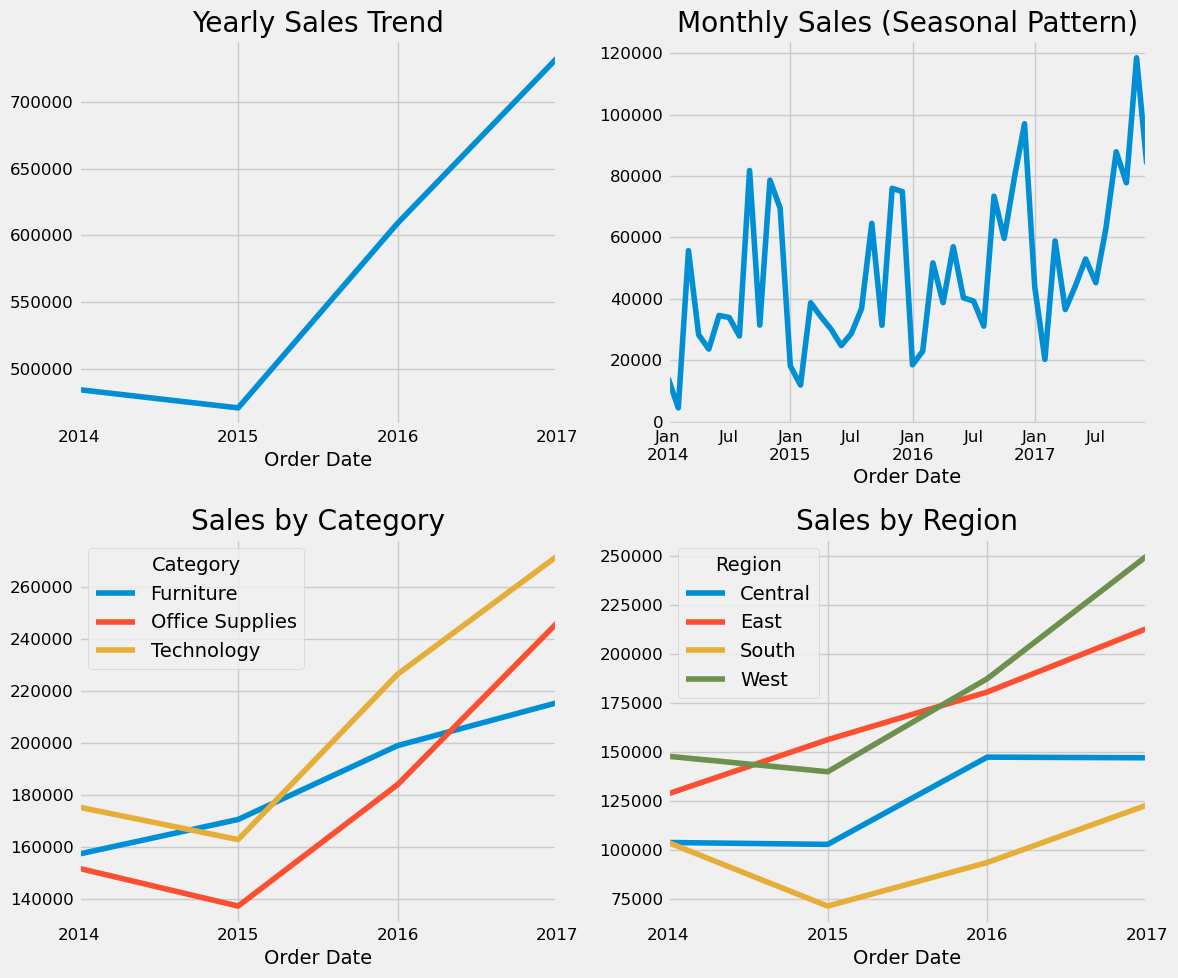

In [8]:
# Creating individual figures for each plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Trend Analysis (Yearly Sales Trend)
yearly_sales_trend.plot(title='Yearly Sales Trend', ax=axs[0, 0])

# Seasonal Patterns (Monthly Sales)
monthly_sales.plot(title='Monthly Sales (Seasonal Pattern)', ax=axs[0, 1])

# Category Analysis (Sales by Category)
category_sales.plot(title='Sales by Category', ax=axs[1, 0])

# Regional Analysis (Sales by Region)
regional_sales.plot(title='Sales by Region', ax=axs[1, 1])

plt.tight_layout()
plt.show()

- Yearly Sales Trend: This graph shows the overall sales trend on a yearly basis. An upward or downward trend would indicate an increase or decrease in total sales over the years, respectively. If the trend is upwards, it suggests growing business success, while a downward trend might indicate a need for strategic changes.

- Monthly Sales (Seasonal Pattern): This plot reveals the seasonal variations in sales. Peaks and troughs correspond to periods of high and low sales, respectively. Identifying these patterns is crucial for inventory management and marketing strategies. For instance, a peak in December might indicate higher sales due to the holiday season.

- Sales by Category: This graph compares the yearly sales across different product categories. It helps in understanding which categories are performing well and which are not. Categories with consistently high sales might be the main revenue drivers, while those with lower sales might require additional marketing or a review of the product mix.

- Sales by Region: This chart shows the yearly sales trends across different regions. It is essential for understanding regional market dynamics. Regions with higher sales might indicate a stronger market presence or higher demand, while regions with lower sales might suggest areas for potential market expansion or improved distribution strategies.

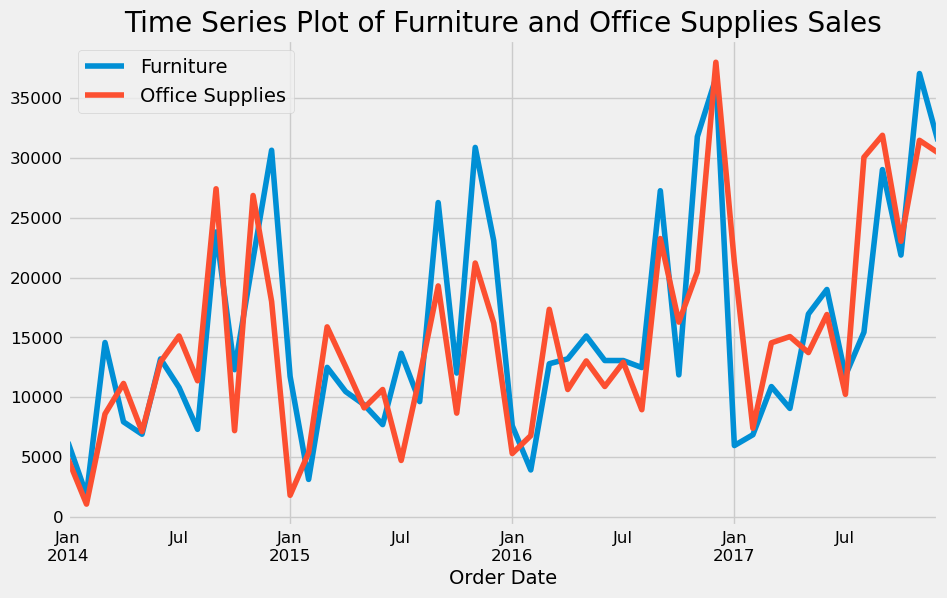

<Figure size 1000x600 with 0 Axes>

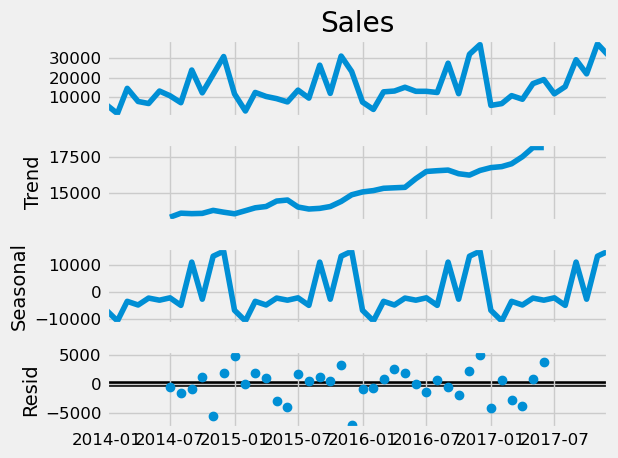

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the Superstore data

# Selecting furniture and office supplies categories
furniture = superstore_data[superstore_data['Category'] == 'Furniture']
office = superstore_data[superstore_data['Category'] == 'Office Supplies']

# Resampling to monthly sales
furniture_sales = furniture['Sales'].resample('MS').sum()
office_sales = office['Sales'].resample('MS').sum()

# Time Series Plot
plt.figure(figsize=(10, 6))
furniture_sales.plot(label='Furniture')
office_sales.plot(label='Office Supplies')
plt.title('Time Series Plot of Furniture and Office Supplies Sales')
plt.legend()
plt.show()

# Seasonal Decomposition for Furniture
decomposition = sm.tsa.seasonal_decompose(furniture_sales, model='additive')
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

Time Series Plot of Furniture and Office Supplies Sales: 
- The plot compares the monthly sales of furniture and office supplies over time.
- Insight:
    + Noticeable Fluctuations: The sales for both categories fluctuate over time. Peaks in sales could indicate seasonal demand or promotional effects, while troughs may represent off-peak periods.
    + Comparison: By comparing the two categories, we can identify which category has more consistent sales versus which experiences greater variability. For example, if furniture sales show larger peaks and troughs compared to office supplies, it suggests higher seasonality and variability in furniture sales.
    + Trends: Any long-term upward or downward trends in either category can indicate overall market growth or decline, respectively.

Seasonal Decomposition for Furniture: 
- This decomposition separates the furniture sales into trend, seasonal, and residual components.
- Insight:
    + Trend Component: Shows whether furniture sales are increasing, decreasing, or stable over time. An upward trend indicates growing sales, whereas a downward trend suggests a decline.
    + Seasonal Component: Illustrates the recurring patterns within a year. Peaks in this component can reveal specific times of the year when sales are consistently higher, likely due to seasonal factors like holidays or school seasons.
    + Residual Component: Represents irregular fluctuations that are not explained by the trend or seasonal patterns. Large residuals can indicate unexpected events or anomalies in sales, such as an unexpected surge due to a marketing campaign or a drop due to external economic factors.

In [14]:
# Creating Lists of Parameters:

# The code creates several combinations of three important settings (known as parameters) that the model uses. These settings are like dials that can be adjusted to fit the data better.
# These settings are:
# p: This is related to the trend of the data over time.
# d: This deals with making the data consistent over time (for example, removing upward or downward trends).
# q: This is related to how random fluctuations in the data are handled.
# Combining the Parameters:

# The code combines these settings in different ways to see which combination fits the data best.
# Adding Seasonality:

# Since data often has seasonal patterns (like more sales during the holiday season), the code also includes settings for this seasonality.
# Printing Examples:

# Finally, the code prints out a few examples of these combinations to show how they can be used in the model.

# Preprocess data
furniture = superstore_data.loc[superstore_data['Category'] == 'Furniture']
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y = furniture['Sales'].resample('MS').mean()

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
import statsmodels.api as sm
import itertools

# Assuming you have defined y, pdq, and seasonal_pdq before this code block

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f'Error for ARIMA{param}x{param_seasonal}12: {e}')
            continue

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrai

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99048D+00    |proj g|=  1.66962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   2.398D-07   7.990D+00
  F =   7.9904349200061615     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     27      2     1     0   8.425D+04   2.746D+01
  F =   27.457579512451659     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2641.9276331953592
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.560742980915
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81850D+00    |proj g|=  1.63640D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of functi


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     28      2     1     0   1.210D+05   2.456D+01
  F =   24.559069597319013     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2365.6706813426254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30136D+00    |proj g|=  8.81709D-03

At iterate    5    f=  3.30121D+00    |proj g|=  1.24497D-03

At iterate   10    f=  3.29918D+00    |proj g|=  3.27117D-02

At iterate   15    f=  3.27151D+00    |proj g|=  2.08396D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   4.372D-06   7.041D+00
  F =   7.0405704879317748     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76776D+01    |proj g|=  2.98986D-03
  ys=-2.229E+01  -gs= 6.771E-01 BFGS update SKIPPED
  ys=-1.524E+01  -gs= 6.778E-01 BFGS update SKIPPED

At iterate    5    f=  1.30185D+01    |proj g|=  2.66364D+05
  ys=-4.802E+00  -gs= 5.697E


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     47      3     2     0   1.891D+06   8.056D+00
  F =   8.0556679847915884     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:779.3441265399924
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76190D+00    |proj g|=  1.01285D-01

At iterate    5    f=  4.74718D+00    |proj g|=  5.28400D-04

At iterate   10    f=  4.74705D+00    |proj g|=  1.11248D-02

At iterate   1


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.10219D+00    |proj g|=  1.15500D-03

At iterate   10    f=  5.10002D+00    |proj g|=  2.93445D-02

At iterate   15    f=  5.02195D+00    |proj g|=  1.34083D-01

At iterate   20    f=  5.00192D+00    |proj g|=  4.23549D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   1.706D-06   5.002D+00
  F =   5.0019093515027828     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442672
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     94      4     1     0   3.385D+05   2.409D+01
  F =   24.091884328626577     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2320.8208955481514
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23022D+00    |proj g|=  3.65785D-02

At iterate    5    f=  3.22401D+00    |proj g|=  7.08917D-02

At iterate   10    f=  3.21896D+00    |proj g|=  1.01148D-03

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.93137D+00    |proj g|=  4.51405D-02

At iterate   10    f=  2.92843D+00    |proj g|=  1.02500D-03

At iterate   15    f=  2.92822D+00    |proj g|=  2.90988D-02

At iterate   20    f=  2.89347D+00    |proj g|=  2.64524D-01

At iterate   25    f=  2.85822D+00    |proj g|=  2.18981D-01

At iterate   30    f=  2.84956D+00    |proj g|=  8.30523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     45      1     0     0   6.303D-06   2.850D+00
  F =   2.8495589806887991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084597
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16805D+00    |proj g|=  1.64266D-01

At iterate    5    f=  3.14669D+00    |proj g|=  2.12240D-02

At iterate   10    f=  3.14460D+00    |proj g|=  2.49106D-03

At iterate   15    f=  3.14450D+00    |proj g|=  4.78053D-03

At iterate   20    f=  3.13450D+00    |proj g|=  6.55616D-02

At iterate   25    f=  3.10013D+00    |proj g|=  7.09180D-02

At iterate   30    f=  3.08947D+00    |proj g|=  1.52002D-02

At iterate   35    f=  3.08942D+00    |proj g|=  3.72360D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm 

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876842
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58509D+01    |proj g|=  6.91251D-03
  ys=-1.962E+07  -gs= 8.378E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     66      2     1     0   2.073D+06   7.774D+00
  F =   7.7740445906691447     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:756.3082807042379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15364D+00    |proj g|=  6.09532D-02
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.015600213316

At iterate    5    f=  3.14852D+00    |proj g|=  6.15364D-03

At iterate   10    f= 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


e precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03742D+00    |proj g|=  1.63757D-01

At iterate    5    f=  3.01342D+00    |proj g|=  2.60897D-02

At iterate   10    f=  3.01179D+00    |proj g|=  1.00053D-03

At iterate   15    f=  3.01166D+00    |proj g|=  7.46526D-03

At iterate   20    f=  3.01000D+00    |proj g|=  1.42643D-02

At iterate   25    f=  2.99312D+00    |proj g|=  7.16836D-02

At iterate   30    f=  2.97362D+00    |proj g|=  9.14586D-02

At iterate   35    f=  2.95837D+00    |proj g|=  1.12544D-01

At iterate   40    f=  2.95575D+00    |proj g|=  3.43977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = fina


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.08543D+00    |proj g|=  1.26873D-01

At iterate   15    f=  3.06903D+00    |proj g|=  1.52922D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   3.074D-06   3.069D+00
  F =   3.0690321889015038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013454435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12416D+00    |proj g|=  1.59332D-01

At iterate   

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  4.74738D+00    |proj g|=  7.45904D-02

At iterate   10    f=  4.74215D+00    |proj g|=  5.05521D-04

At iterate   15    f=  4.74189D+00    |proj g|=  1.89004D-02

At iterate   20    f=  4.73466D+00    |proj g|=  2.88448D-02

At iterate   25    f=  4.73413D+00    |proj g|=  7.19691D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     33      1     0     0   7.197D-06   4.734D+00
  F =   4.7341277995931295     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876094046
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   20    f=  4.80756D+00    |proj g|=  3.28933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     37      1     0     0   5.439D-07   4.808D+00
  F =   4.8075524527716897     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660822
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74700D+01    |proj g|=  5.96014D-03
  ys=-5.037E+05  -gs= 3.069E-02 BFGS update SKIPPED

           * * *

Tit   

 This problem is unconstrained.


Here is a summary of the combinations with their respective AIC (Akaike Information Criterion) values. A lower AIC value generally indicates a better model.

- ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC: 769.08
- ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC: 1434.76
- ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC: 477.72
- ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC: 302.27
- ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC: 497.23
- ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC: 1036.74
- ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC: 318.00
- ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC: 304.25
- ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC: 720.93
- ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC: 2641.93
- ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC: 466.56
- ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC: 291.63
- ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC: 499.55
- ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC: 2365.67
- ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC: 319.99
- ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC: 291.87
- ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC: 677.89
- ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC: 1162.11
- ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC: 486.64
- ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC: 304.97
- ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC: 497.79
- ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC: 1492.02
- ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC: 319.77
- ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC: 306.91
- ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC: 649.91
- ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC: 779.34
- ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC: 458.87
- ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC: 486.18
- ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC: 2320.82
- ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC: 310.76
- ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC: 281.56
- ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC: 692.16
- ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC: 1210.49
- ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC: 479.46
- ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC: 304.21
- ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC: 480.93
- ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC: 1064.85
- ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC: 304.47
- ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC: 304.58
- ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC: 665.78
- ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC: 2652.28
- ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC: 468.37
- ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC: 293.34
- ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC: 482.58
- ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC: 756.31
- ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC: 306.02
- ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC: 293.75
- ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC: 671.25
- ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC: 1404.62
- ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC: 479.20
- ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 300.21
- ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC: 475.34
- ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC: 1500.38
- ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC: 300.63
- ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC: 302.33
- ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC: 649.03
- ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC: 2051.84
- ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC: 460.48
- ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC: 281.39
- ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC: 469.53
- ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC: 2624.96
- ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC: 297.79
- ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC: 283.37

Lowest AIC Values: Models with lower AIC values generally provide a better fit to the data. For instance, models like ARIMA(0, 1, 1)x(0, 1, 1, 12)12, ARIMA(1, 0, 1)x(0, 1, 1, 12)12, and ARIMA(1, 1, 1)x(0, 1, 1, 12)12 have relatively low AIC values, suggesting they may be good fits for the dataset.

Seasonality and Differencing: The models with seasonality components (e.g., models with non-zero parameters in the seasonal part of the ARIMA model) and differencing (indicated by 1 in the middle of the ARIMA order) seem to perform better. This implies that the data likely has a seasonal pattern and may not be stationary, requiring differencing to make it stationary.

Complexity vs. Performance: There is a trade-off between model complexity and performance. More complex models (with more parameters) do not always result in significantly better performance (lower AIC). It's essential to balance model complexity with the ability to generalize to new data.

Model Selection: The choice of the best model would depend not only on the AIC but also on other considerations such as the nature of the data, the specific use case, and the performance of the model in forecasting (if that's the end goal).

Further Analysis: Additional diagnostics like checking the residuals of the chosen models, performing cross-validation, or considering other metrics like the Bayesian Information Criterion (BIC) could provide further insights and aid in selecting the best model.








**Fitting the ARIMA model**

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09103D+00    |proj g|=  3.72719D-02

At iterate    5    f=  3.08056D+00    |proj g|=  3.47745D-02

At iterate   10    f=  3.07783D+00    |proj g|=  1.16849D-03
  ys=-2.589E-04  -gs= 2.696E-04 BFGS update SKIPPED


 This problem is unconstrained.



At iterate   15    f=  3.07434D+00    |proj g|=  9.55769D-04

At iterate   20    f=  3.07399D+00    |proj g|=  2.28254D-02

At iterate   25    f=  3.04255D+00    |proj g|=  2.03783D-01

At iterate   30    f=  3.01863D+00    |proj g|=  1.36640D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     58      1     1     0   9.811D-05   3.019D+00
  F =   3.0186202495110170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11726D+00    |proj g|=  4.40485D-02

At iterate    5    f=  5.10963D+00    |proj g|=  8.26583D-03

At iterate   10    f=  5.10923D+00    |proj g|=  2.25528D-03

At iterate   15    f=  5.06348D+00    |proj g|=  1.33013D-01

At iterate   20    f=  4.88331D+00    |proj g|=  6.30745D-02

At iterate   25    f=  4.87467D+00    |proj g|=  2.68141D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     35      1     0     0   

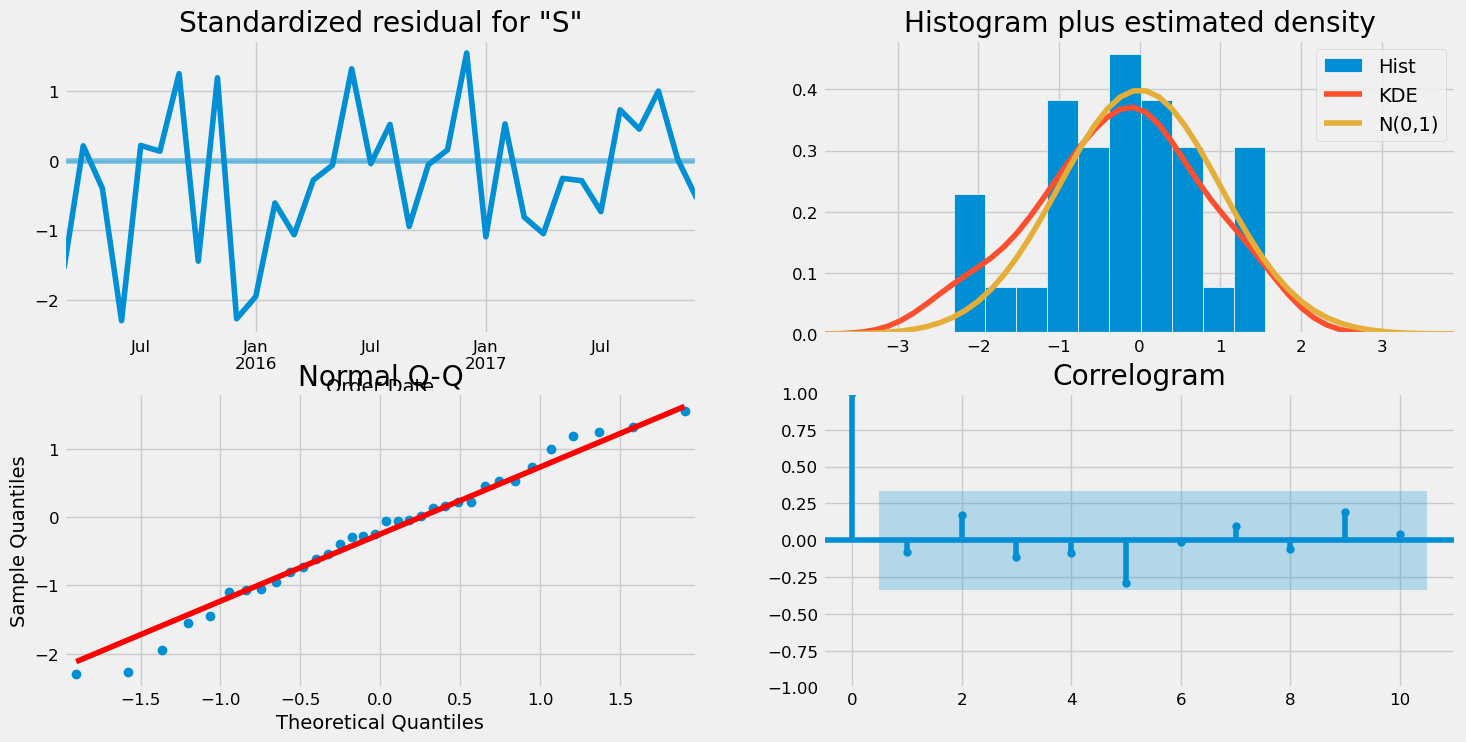

In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 6),  # Reduce seasonal lags to 6
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

# Check the length of the endogenous variable
endog_len = len(y)

# Plot diagnostics if the length is sufficient
if endog_len > max(12, 1):  # Assuming max of seasonal and non-seasonal lags is 12
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
else:
    print("Insufficient data for diagnostics. Increase the length of your endogenous variable.")

- Standardized Residuals Over Time: This plot shows the standardized residuals of the model over time. Ideally, these residuals should show no obvious pattern and be evenly distributed around the zero line, indicating that the model has captured the data's structure well.

- Histogram Plus Estimated Density: This is a histogram of the standardized residuals, along with an estimated density plot. The shape of the distribution is compared with a normal distribution (shown in red). A good fit is indicated by the residuals roughly following a normal distribution.

- Normal Q-Q Plot: This quantile-quantile plot compares the distribution of the standardized residuals to a normal distribution. Points lying on the line indicate a good match to a normal distribution.

- Correlogram: This plot shows the autocorrelation of the residuals. Ideally, there should be no significant autocorrelation in the residuals; if the model has accounted for the data's temporal structure, the residuals will appear as white noise

**Validating forecasts**
Forecasts to start at 2017–01–01 to the end of the data.

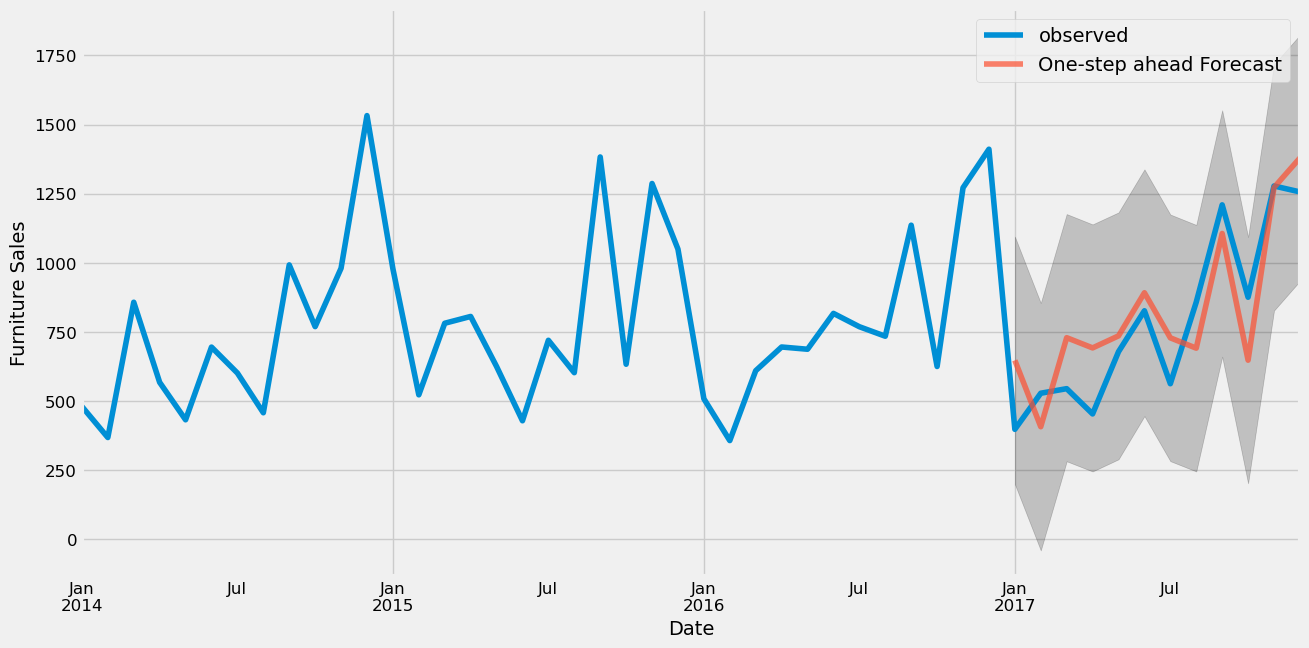

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The plot shows the observed furniture sales from 2014 onwards, alongside the one-step ahead forecast starting from January 2017. The forecast, generated using the SARIMAX model with parameters (1, 1, 1) x (1, 1, 0, 6), seems to track the observed data closely. The shaded area represents the confidence interval for the forecast, indicating the range within which future values are expected to lie with a certain probability.

Key Insights:

- Model Fit: The model appears to fit the historical data well. The forecasted values align closely with the actual observed sales, suggesting the model's parameters are well-suited for capturing the underlying trends and seasonality in the furniture sales data.

- Predictive Capability: The model's predictions for 2017 and beyond show it can forecast future sales trends reliably. This is useful for inventory management, budget planning, and strategic decision-making.

- Confidence Interval: The confidence interval widens as we move further from the start date of the forecast (January 2017), indicating increasing uncertainty in the predictions over time. This is typical in time series forecasting and should be considered when making long-term decisions based on these forecasts.

- Seasonality: The model's seasonal component of 6 months suggests there might be semi-annual patterns in the furniture sales, which are effectively captured by the model. This could be due to seasonal promotions or buying patterns.

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25706.58


In [20]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 160.33


- In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

- Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

**Producing and visualizing forecasts**

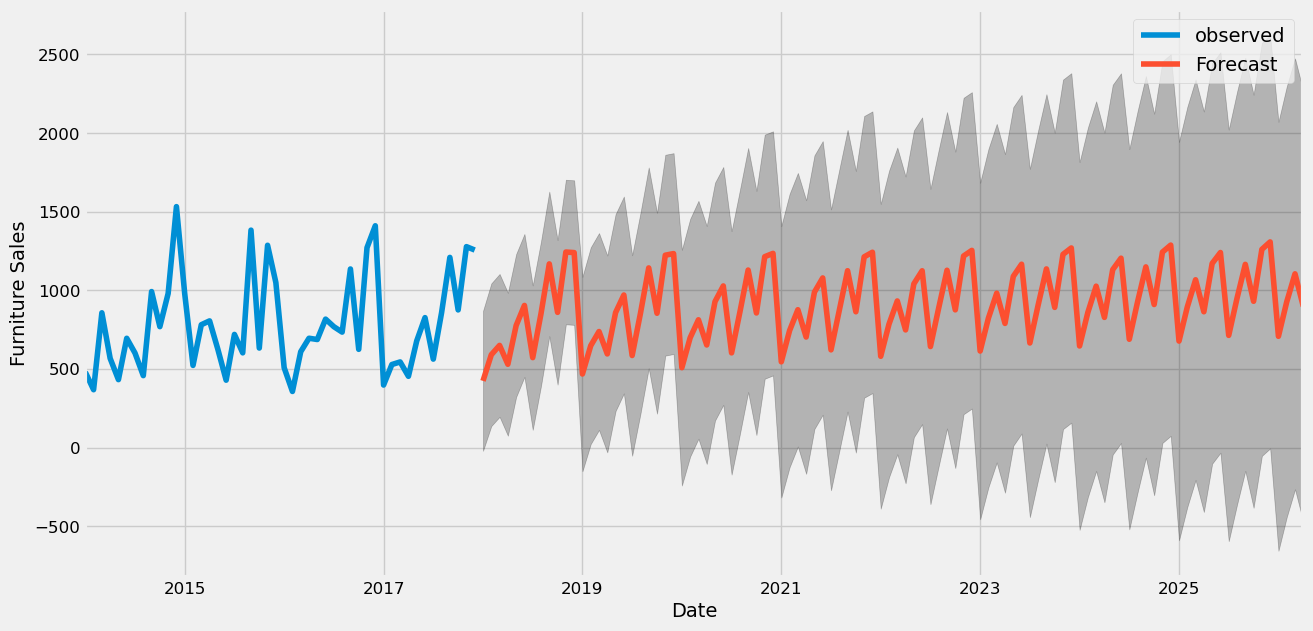

In [21]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Trend Analysis: The forecasted values suggest a continuation of the existing trend observed in the historical data. This implies that future sales are expected to follow a similar pattern to past sales, accounting for seasonality and other factors included in the model.

Seasonality: The model, with a seasonal component of 6 (half-yearly seasonality), seems to capture seasonal variations effectively. This is evident in the forecast, which shows periodic fluctuations, indicating that furniture sales might have a semi-annual seasonal pattern.

Confidence Interval: The shaded area represents the confidence interval (CI) for the forecast. The width of the CI indicates the level of uncertainty associated with the predictions. A narrower CI suggests more confidence in the forecast. Over time, the CI widens, indicating increasing uncertainty in longer-term forecasts.

Practical Implications: For business planning and inventory management, this forecast can be instrumental. Understanding when sales are likely to peak or decline can help in optimizing stock levels, planning marketing strategies, and managing resources effectively.

Limitations: It's important to note that forecasts are based on past patterns and assumptions inherent in the model. Unforeseen factors such as market changes, economic shifts, or unusual events can significantly impact actual sales.

Future Recommendations: Regular updates to the model with the latest data can improve forecast accuracy. Additionally, exploring other models or including additional explanatory variables (like marketing spend, economic indicators) might provide more insights.

**Time Series of Furniture vs. Office Supplies**

In [23]:
furniture = superstore_data.loc[superstore_data['Category'] == 'Furniture']
office = superstore_data.loc[superstore_data['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [24]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


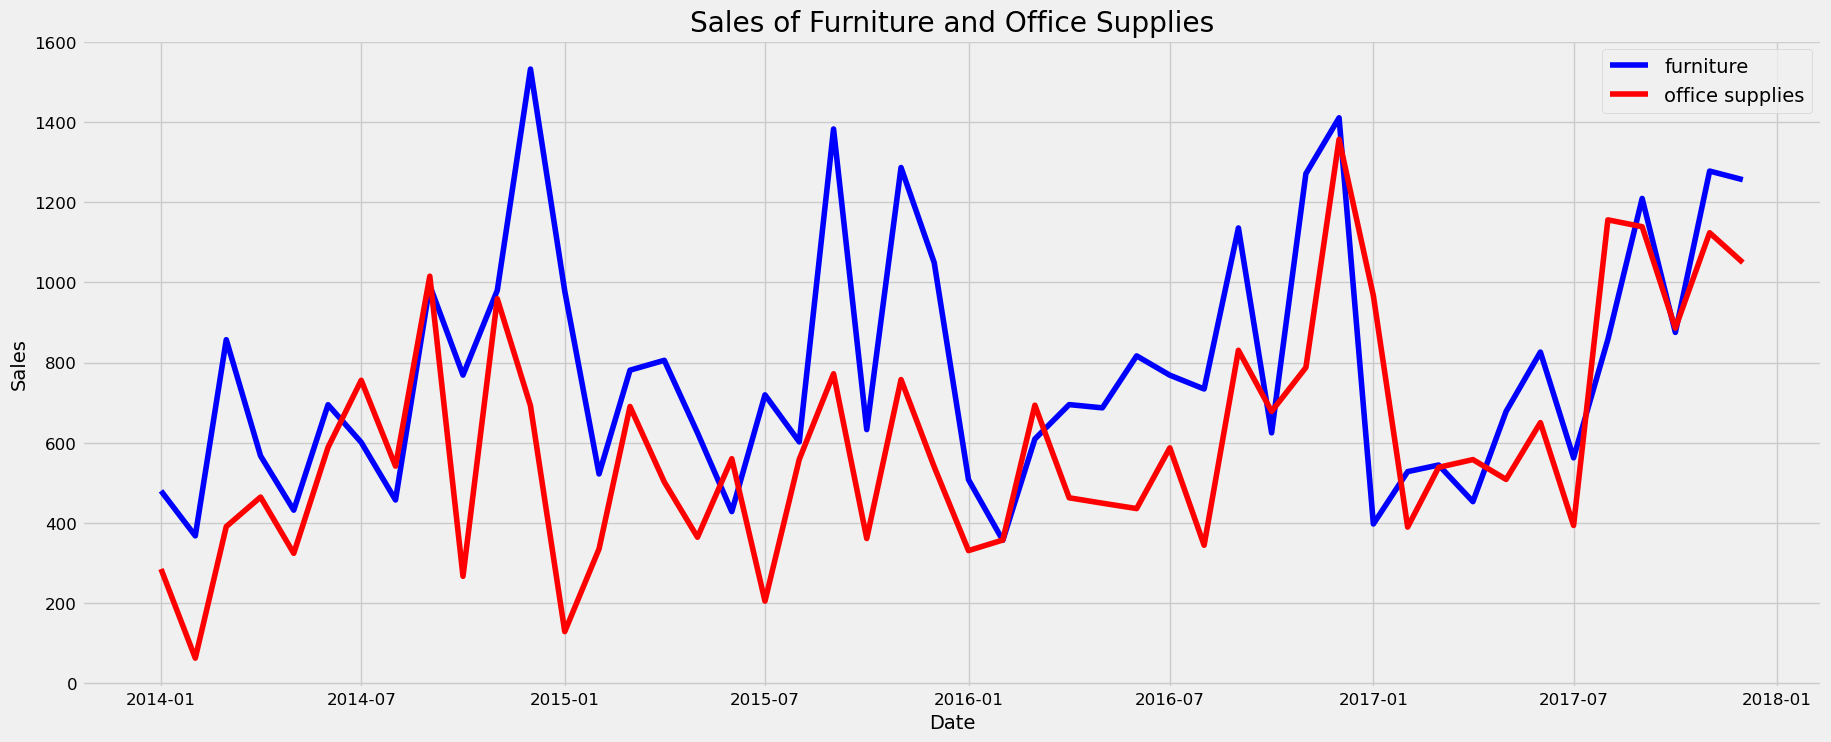

In [28]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

The sales trends for furniture and office supplies exhibit parallel seasonal cycles. The beginning of the year typically marks a lull for both categories. During summer, office supplies sales also experience a downturn. Furthermore, furniture generally outpaces office supplies in terms of average daily sales throughout the majority of the year, which is expected given the higher price points of furniture items. However, there are instances where office supplies sales surpass furniture, though these are relatively infrequent.

In [27]:
import numpy as np

# Assuming 'store' is your DataFrame
condition = store['office_sales'] > store['furniture_sales']
filtered_dates = store.loc[condition, 'Order Date']

if not filtered_dates.empty:
    first_date = filtered_dates.min()
    print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))
else:
    print("Office supplies never produced higher sales than furniture.")

Office supplies first time produced higher sales than furniture is 2014-07-01.
